<a href="https://colab.research.google.com/github/Moaz-Mahmoud-S/Machine-learning/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/sample_data/StudentMarksDataset.csv")

In [3]:
data.head()

,Std_RollNo,Std_Name,Std_Branch,Std_Course,Std_StudyHours,Std_Marks
0,240415,Tanya Gautam,MC,B.Sc 1st year,6.83,78.50
1,240416,Udit Sagan,MC,B.Sc 1st year,6.56,76.74
2,240417,Kratika Sharma,PM,B.Sc 1st year,NaN,78.68
3,240418,Rakesh Kumar,PM,B.Sc 1st year,5.67,71.82
4,240419,Ritika Katara,PM,B.Sc 1st year,8.67,84.19


**Drop the unwanted columns**

In [4]:
data = data [["Std_StudyHours","Std_Marks"]]

In [5]:
data.head()

,Std_StudyHours,Std_Marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


**Checking null values and drop it if exist**

In [7]:
data.info()
data.dropna(subset=['Std_StudyHours'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Std_StudyHours  195 non-null    float64
 1   Std_Marks       200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 199
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Std_StudyHours  195 non-null    float64
 1   Std_Marks       195 non-null    float64
dtypes: float64(2)
memory usage: 4.6 KB


**plotting the data**

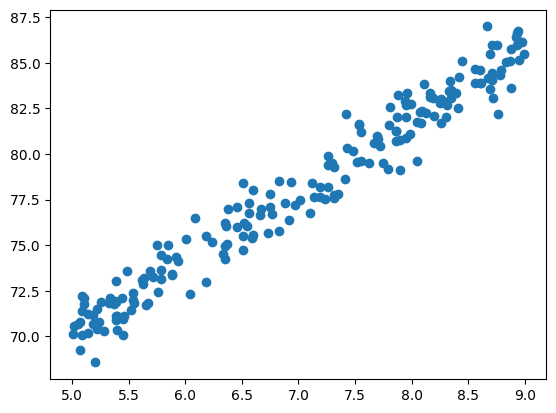

In [9]:
plt.scatter(data["Std_StudyHours"],data["Std_Marks"])
plt.show()

**Cost Function**

In [10]:
def cost_function(m,b,df):
  total_errors = 0
  for i in range(len(df)):
    x = df.iloc[i].Std_StudyHours
    y = df.iloc[i].Std_Marks
    total_errors += (y-(m*x+b))**2
  total_errors/len(df)
  print(total_errors)

**check cost when m=6 and b=40**

In [11]:
cost_function(6,40,data)

4681.960400000001


**implementing the Gridant Descent**

In [12]:
def gridant_descent(m_now,b_now,L,df):

  gridant_m = 0
  gridant_b = 0
  n=len(df)

  for i in range(n):

    x= df.iloc[i].Std_StudyHours
    y= df.iloc[i].Std_Marks
    gridant_m += -(2/n) * x *(y - (m_now*x+b_now))
    gridant_b += -(2/n) *(y - (m_now*x+b_now))

  m = m_now - gridant_m * L
  b = b_now - gridant_b * L

  return m , b


5.382974777399581 39.97674177071998


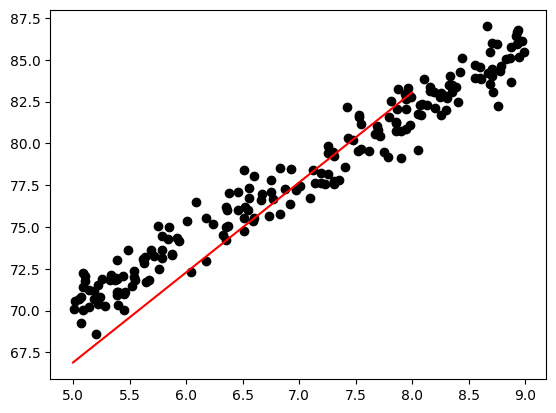

In [13]:
m = 7
b = 40
L = 0.001
epoch = 300

for i in range(epoch):
  m , b = gridant_descent(m,b,L,data)
print(m , b)

plt.scatter(data["Std_StudyHours"],data["Std_Marks"],color="black")
plt.plot(list(range(5,9)), [ m*x+b for x in range(5,9)],color="red")
plt.show()